## Problem Statement

The problem is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

**Importing all the neccessary libraries**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans

In [5]:
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, KFold

In [7]:
import warnings
warnings.filterwarnings("ignore")

## Data

This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010. It is publicly available in the UCI Machine Learning Repository, which can be retrieved from http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#.

In [8]:
data = pd.read_csv('datasets/bank1.csv', header=0, sep=";")

In [9]:
data = data.dropna()

In [10]:
print(data.shape)
print(list(data.columns))

(4119, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


This dataset provides the customer information. It includes 4119 records and 21 fields.

In [11]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Dataset Description

### Attribute Information:

#### Input variables:

**bank client data**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign**

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [12]:
#statistical summary
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
data.size

86499

In [14]:
data.shape 

(4119, 21)

In [15]:
data.ndim

2

## Data Preprocessing

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [16]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [17]:
data['education']=np.where(data['education'] =='basic.9y', 'basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'basic', data['education'])

After grouping, this is the columns

In [18]:
data['education'].unique()

array(['basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

Also the output variable data['y'] has 'yes' or 'no'. Let's convert them to binary 0 or 1 so that it would be easy to process the data.

In [19]:
data['y'] = data['y'].map({'no': 0, 'yes': 1})

In [20]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


## Data exploration

In [21]:
data['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

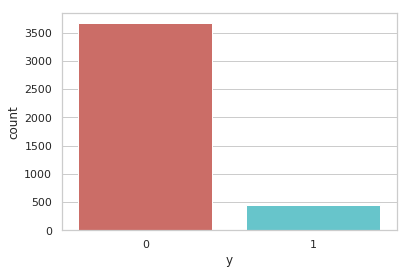

In [22]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()

There are 3668 no's and 451 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

In [23]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


**Observations**

The average age of customers who bought the term deposit is higher than that of the customers who didn't.
The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.
Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [24]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
job,,,,,,,,,,,
admin.,38.240119,261.871542,2.642292,944.025692,0.192688,0.061462,93.527008,-40.014723,3.601909,5165.542885,0.131423
blue-collar,39.265837,261.852941,2.432127,983.270362,0.147059,0.235520,93.669430,-41.571493,3.742370,5174.265611,0.069005
entrepreneur,42.202703,249.202703,2.216216,992.263514,0.141892,0.263514,93.614682,-40.839865,3.931493,5180.600000,0.054054
housemaid,45.672727,229.663636,2.463636,980.909091,0.100000,0.426364,93.658536,-39.324545,4.009182,5179.862727,0.100000
management,42.429012,246.799383,2.432099,953.015432,0.246914,-0.049691,93.483056,-40.591667,3.553451,5165.971914,0.092593
retired,60.873494,311.789157,2.397590,897.301205,0.325301,-0.580120,93.487506,-39.034337,2.875741,5126.062048,0.228916
self-employed,40.679245,254.924528,2.817610,967.691824,0.207547,0.086164,93.575283,-40.323899,3.669296,5166.974843,0.081761
services,38.513995,232.529262,2.844784,978.773537,0.178117,0.067684,93.626059,-41.532061,3.552776,5165.806870,0.089059
student,26.695122,287.134146,1.951220,902.426829,0.487805,-1.192683,93.448329,-39.665854,2.165354,5092.046341,0.231707


In [25]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
marital,,,,,,,,,,,
divorced,45.107623,263.163677,2.542601,972.255605,0.174888,0.143274,93.600547,-40.621973,3.707177,5170.145964,0.096413
married,42.389398,256.289757,2.527700,964.162216,0.173774,0.172260,93.599039,-40.357114,3.728554,5170.724472,0.100438
single,33.209020,254.647875,2.555941,947.338248,0.233304,-0.128448,93.529971,-40.768257,3.352657,5155.756114,0.134432
unknown,42.272727,336.272727,2.545455,999.000000,0.090909,0.181818,93.537545,-39.690909,3.855182,5174.409091,0.090909


In [26]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
high.school,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
professional.course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
university.degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


## Data Visualizations

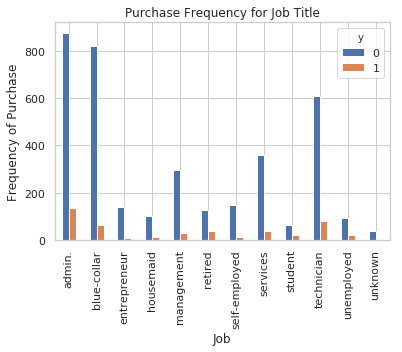

In [27]:
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.show()

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

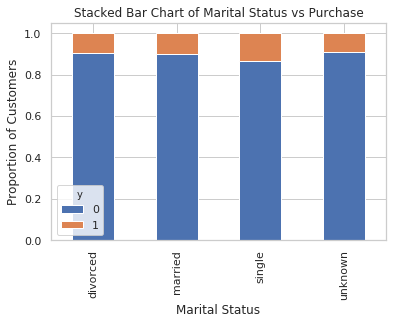

In [28]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.show()

Hard to see, but the marital status does not seem a strong predictor for the outcome variable.

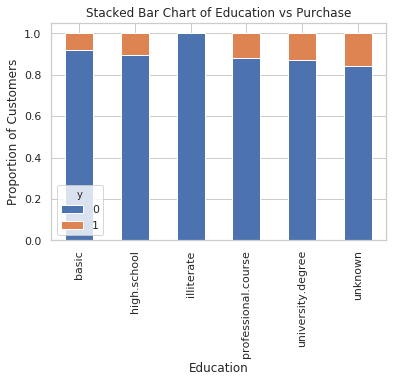

In [29]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.show()

Education seems a good predictor of the outcome variable.

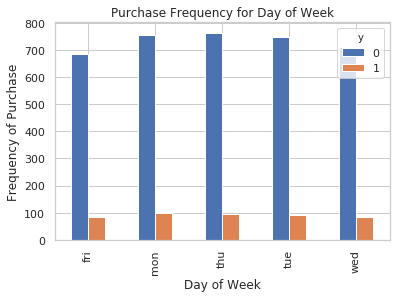

In [30]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.show()

Day of week may not be a good predictor of the outcome

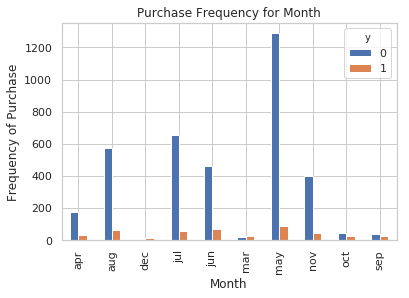

In [31]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.show()

Month might be a good predictor of the outcome variable

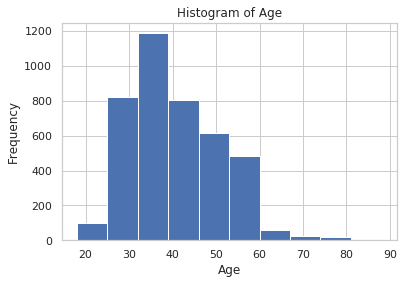

In [32]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The most of the customers of the bank in this dataset are in the age range of 30-40.

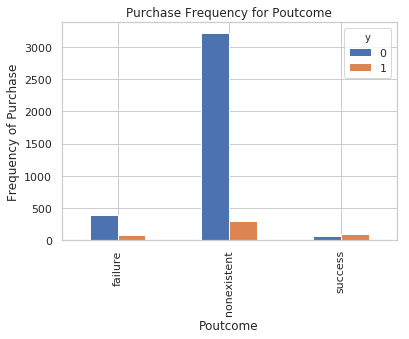

In [33]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.show()

Poutcome seems to be a good predictor of the outcome variable.

## Feature Selection

### Create dummy variables

In [34]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [35]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [36]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [37]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

### RFE

In [38]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)

[False False False False  True False False False  True False False  True
  True False  True False  True  True False False False False False False
 False False False False False False False False False False False False
  True False False False False False  True False False  True  True  True
  True  True False  True False False False False False False  True  True
  True]


In [39]:
cols=[]
for i in range(len(rfe.support_)):
    if(rfe.support_[i]):
        cols.append(str(data_final.columns.values[i]))  
cols

['previous',
 'euribor3m',
 'job_admin.',
 'job_blue-collar',
 'job_housemaid',
 'job_retired',
 'job_self-employed',
 'housing_no',
 'contact_cellular',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_nov',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_nonexistent']

The Recursive Feature Elimination (RFE) has helped us select the following features: 'previous',
 'euribor3m',
 'job_admin.',
 'job_blue-collar',
 'job_housemaid',
 'job_retired',
 'job_self-employed',
 'housing_no',
 'contact_cellular',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_nov',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_nonexistent'.

In [40]:
X=data_final[cols]
y=data_final['y']

In [41]:
X.head()

,previous,euribor3m,job_admin.,job_blue-collar,job_housemaid,job_retired,job_self-employed,housing_no,contact_cellular,month_aug,month_dec,month_jul,month_jun,month_mar,month_nov,day_of_week_wed,poutcome_failure,poutcome_nonexistent
0,0,1.313,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,4.855,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,4.962,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
3,0,4.959,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,4.191,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [42]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
accuracy_dict = {}

## Logistic Regression

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Predicting the test set results and caculating the accuracy

In [46]:
y_pred = logreg.predict(X_test)

In [47]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


### Cross Validation

In [48]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(logreg, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy (LR): %.3f" % (results.mean()))

10-fold cross validation average accuracy (LR): 0.901


### Confusion Matrix

In [49]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1100   14]
 [ 103   19]]


The result is telling us that we have 1100+19 correct predictions and 103+14 incorrect predictions.

In [50]:
accuracy_dict["LR"] = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1114
           1       0.58      0.16      0.25       122

   micro avg       0.91      0.91      0.91      1236
   macro avg       0.75      0.57      0.60      1236
weighted avg       0.88      0.91      0.88      1236



## Logistic Regression from scratch

In [52]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [53]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [54]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost[0]

In [55]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))
#     X = add_intercept(X)
    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)
    return (cost_history, params)

In [56]:
def predict(X, params):
#     X = add_intercept(X)
    return np.round(sigmoid((X @ params)))

In [57]:
m = len(X_train.values)
X = np.hstack((np.ones((m,1)),X_train.values))
n = np.size(X,1)
params = np.zeros((n,1))
y = y_train.values

In [58]:
iterations = 40
learning_rate = 0.03

In [59]:
initial_cost = compute_cost(X, y, params)
print("Initial Cost is: {} \n".format(initial_cost))

Initial Cost is: 0.6931271807599437 



In [61]:
(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)
print("Optimal Parameters are: \n", params_optimal, "\n")

Optimal Parameters are: 
 [[-0.21892458 -0.21892458 -0.21892458 ...  0.21892458 -0.21892458
   0.21892458]
 [-0.07118811 -0.07118811 -0.07118811 ...  0.07118811 -0.07118811
   0.07118811]
 [-0.60313683 -0.60313683 -0.60313683 ...  0.60313683 -0.60313683
   0.60313683]
 ...
 [-0.03988409 -0.03988409 -0.03988409 ...  0.03988409 -0.03988409
   0.03988409]
 [-0.03879469 -0.03879469 -0.03879469 ...  0.03879469 -0.03879469
   0.03879469]
 [-0.16565622 -0.16565622 -0.16565622 ...  0.16565622 -0.16565622
   0.16565622]] 



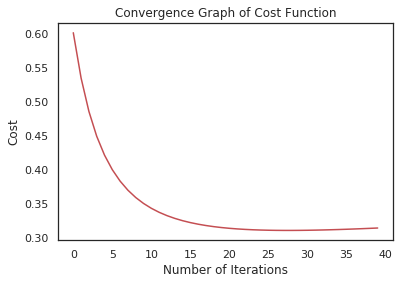

In [62]:
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [63]:
params_optimal_list = []
for i in range(len(params_optimal)):
    params_optimal_list.append(params_optimal[i][0])

In [64]:
mm = len(X_test.values)
X_test_temp = np.append(X_test.values, np.ones((mm,1)), axis=1)
y_pred = predict(X_test_temp, params_optimal_list)

In [65]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1114    0]
 [ 122    0]]


In [66]:
accuracy_dict["LR_S"] = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

## Support Vector Machine

In [67]:
svclassifier = SVC(kernel='linear') 
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [68]:
y_pred = svclassifier.predict(X_test)

In [69]:
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svclassifier.score(X_test, y_test)))

Accuracy of SVM classifier on test set: 0.90


In [70]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1098   16]
 [ 103   19]]


In [71]:
accuracy_dict["SVM"] = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1114
           1       0.54      0.16      0.24       122

   micro avg       0.90      0.90      0.90      1236
   macro avg       0.73      0.57      0.60      1236
weighted avg       0.88      0.90      0.88      1236



In [73]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
results = model_selection.cross_val_score(svclassifier, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy (SVM): %.3f" % (results.mean()))

10-fold cross validation average accuracy (SVM): 0.899


## KNN

In [74]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [75]:
y_pred = knn.predict(X_test)

In [76]:
print('Accuracy of KNN on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of KNN on test set: 0.89


In [77]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1079   35]
 [  99   23]]


In [78]:
accuracy_dict["KNN"] = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1114
           1       0.40      0.19      0.26       122

   micro avg       0.89      0.89      0.89      1236
   macro avg       0.66      0.58      0.60      1236
weighted avg       0.86      0.89      0.87      1236



## KMeans

In [80]:
kmeans = KMeans(n_clusters=2)
kmeans_r = kmeans.fit(X_train)

In [81]:
y_pred = kmeans_r.predict(X_test)

In [82]:
centroids = kmeans.cluster_centers_
print(centroids)

[[5.34663866e-01 1.15610399e+00 2.68907563e-01 2.02731092e-01
  1.99579832e-02 5.77731092e-02 3.15126050e-02 4.03361345e-01
  9.01260504e-01 7.98319328e-02 1.78571429e-02 3.36134454e-02
  7.03781513e-02 3.57142857e-02 4.83193277e-02 1.68067227e-01
  2.86764706e-01 6.06092437e-01]
 [3.31434490e-02 4.80937494e+00 2.39254272e-01 2.22164682e-01
  3.10719834e-02 3.21077162e-02 3.52149146e-02 4.54168824e-01
  5.25634386e-01 1.92646297e-01 5.17866390e-04 2.39254272e-01
  1.54842051e-01 2.34187669e-16 1.40859658e-01 2.05075091e-01
  3.05541170e-02 9.66856551e-01]]


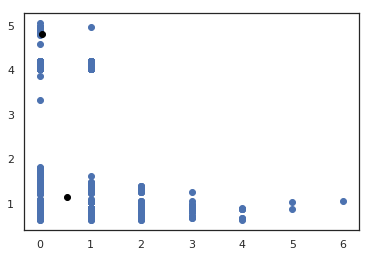

In [83]:
plt.scatter(X_train.values[:,0], X_train.values[:,1])
    
plt.scatter(centroids[0][0],centroids[0][1], c="black")
plt.scatter(centroids[1][0],centroids[1][1], c="black")
plt.show()

In [84]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[308 806]
 [ 82  40]]


In [85]:
accuracy_dict["KMeans"] = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.28      0.41      1114
           1       0.05      0.33      0.08       122

   micro avg       0.28      0.28      0.28      1236
   macro avg       0.42      0.30      0.25      1236
weighted avg       0.72      0.28      0.38      1236



## Accuracy Plots

In [87]:
accuracy_dict

{'LR': 0.9053398058252428,
 'LR_S': 0.901294498381877,
 'SVM': 0.9037216828478964,
 'KNN': 0.8915857605177994,
 'KMeans': 0.2815533980582524}

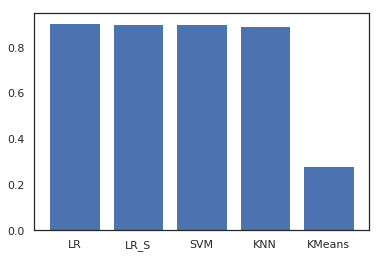

In [88]:
plt.bar(*zip(*accuracy_dict.items()))
plt.show()

## Model Evaluation

In [89]:
scores_lr = []
best_lr = LogisticRegression()
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train = []; y_train = []
    X_val = []; y_val = []
    for i in train_index:
        X_train.append(X[i])
        y_train.append(y[i])
    for i in test_index:
        X_val.append(X[i])
        y_val.append(y[i])
    best_lr.fit(X_train, y_train)
    scores_lr.append(best_lr.score(X_val, y_val))

scores_lr

[0.9100346020761245,
 0.8858131487889274,
 0.9100346020761245,
 0.875,
 0.9270833333333334,
 0.9201388888888888,
 0.8923611111111112,
 0.8993055555555556,
 0.8993055555555556,
 0.8854166666666666]

In [90]:
scores_svm = []
best_svm = SVC(kernel='linear') 
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train = []; y_train = []
    X_val = []; y_val = []
    for i in train_index:
        X_train.append(X[i])
        y_train.append(y[i])
    for i in test_index:
        X_val.append(X[i])
        y_val.append(y[i])
    best_svm.fit(X_train, y_train)
    scores_svm.append(best_svm.score(X_val, y_val))
    
scores_svm

[0.9065743944636678,
 0.8858131487889274,
 0.8996539792387543,
 0.875,
 0.9131944444444444,
 0.9201388888888888,
 0.90625,
 0.9027777777777778,
 0.8923611111111112,
 0.8854166666666666]

In [91]:
scores_knn = []
best_knn = KNeighborsClassifier(n_neighbors=5) 
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train = []; y_train = []
    X_val = []; y_val = []
    for i in train_index:
        X_train.append(X[i])
        y_train.append(y[i])
    for i in test_index:
        X_val.append(X[i])
        y_val.append(y[i])
    best_knn.fit(X_train, y_train)
    scores_knn.append(best_knn.score(X_val, y_val))
    
scores_knn

[0.9065743944636678,
 0.8823529411764706,
 0.8961937716262975,
 0.8680555555555556,
 0.9027777777777778,
 0.9097222222222222,
 0.8958333333333334,
 0.8993055555555556,
 0.90625,
 0.8958333333333334]

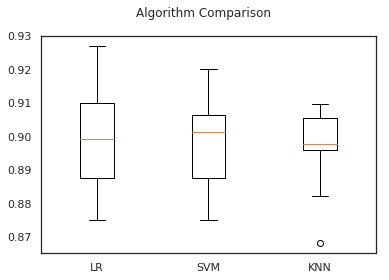

In [92]:
#Comparing the results
names =['LR', 'SVM', 'KNN']
results= []
results.append(scores_lr)
results.append(scores_svm)
results.append(scores_knn)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()